In [56]:
import pandas as pd
import os
import numpy as np

In [35]:
path_dir = 'E:\\PycharmProjects\\Demo0410\\work_data_liziqi\\data'
excel_file = 'shenghuo_comments_32741.xlsx'
path_file = os.path.join(path_dir,excel_file)

In [38]:
shenghuo_comments_df = pd.read_excel(path_file,usecols=['text','user_name','create_time'])
shenghuo_comments_df.index = shenghuo_comments_df.index + 1
xiangwang_time_df = shenghuo_comments_df.loc[shenghuo_comments_df['text'].str.contains('向往', na=False)]  #选取其中包含“向往”一词的数据。
xiangwang_time_df.index = (xiangwang_time_df.reset_index()).index + 1  #重新设置筛选后的数据框并使索引从1开始。

In [89]:
xiangwang_time_df['create_time'] = pd.to_datetime(xiangwang_time_df['create_time'],unit='s')  #利用pd.to_datatime方法将时间戳转换为日期、日间格式，参数unit='s'表示将原点时间设置为1970-01-01。
xiangwang_time_df['year_month'] = xiangwang_time_df['create_time'].map(lambda x: 100*x.year + x.month)  #提取年份和月份，转换为类似于202105的格式。


e:\pycharmprojects\demo0410\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
e:\pycharmprojects\demo0410\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
from collections import Counter
data = Counter(xiangwang_time_df['year_month'])

In [91]:
s  = sorted(data)
s

[201705,
 201706,
 201707,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104]

In [92]:
list_time = []
list_tnum = []
for i in sorted(data):
    print(i,data[i])
    list_time.append(i)
    list_tnum.append(data[i])


201705 1
201706 1
201707 1
201709 38
201710 166
201711 37
201712 87
201801 44
201802 41
201803 40
201804 47
201805 144
201806 114
201807 217
201808 53
201809 37
201810 89
201811 61
201812 31
201901 118
201902 28
201903 76
201904 66
201905 120
201906 159
201907 134
201908 183
201909 151
201910 97
201911 100
201912 186
202001 161
202002 225
202003 107
202004 211
202005 136
202006 316
202007 242
202008 350
202009 337
202010 495
202011 125
202012 81
202101 147
202102 113
202103 39
202104 74


In [93]:
len(list_tnum)

47

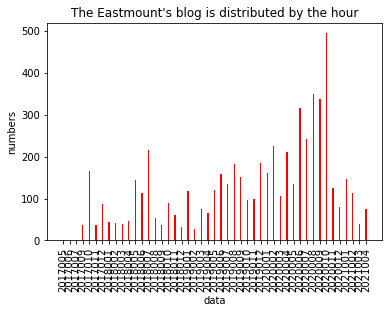

In [72]:
import matplotlib.pyplot as plt
N = 47
ind = np.arange(N)
width=0.2
plt.bar(ind, list_tnum, width, color='r', label='hour')
plt.xticks(ind, list_time, rotation=90)
plt.title("The Eastmount's blog is distributed by the hour")
plt.xlabel('data')
plt.ylabel('numbers')
#plt.savefig('Eastmount-01.png',dpi=400)
plt.show()


In [100]:
from pyecharts import options as opts
from pyecharts.charts import Bar

bar=(
    Bar()
        .add_xaxis(list_time)
        .add_yaxis("次数", list_tnum, color="blue")
        .set_global_opts(title_opts=opts.TitleOpts(
            title='“向往”一词出现频率按月份分布', subtitle="month"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(
            # is_show=True 是否显示标签
            is_show=True,
            # position 标签的位置 可选 'top'，'left'，'right'，'bottom'，'inside'，'insideLeft'，'insideRight'.....
            position='bottom',
            # font_size 文字的字体大小
            font_size=10,
            # color 文字的颜色
            #color= '#FF6633',
            # font_style 文字字体的风格，可选 'normal'，'italic'，'oblique'
            #font_style = 'italic' , #斜体
            # font_weight 文字字体的粗细  'normal'，'bold'，'bolder'，'lighter'
            font_weight = None,
            # font_family 字体 'Arial', 'Courier New', 'Microsoft YaHei（微软雅黑）' ....
            font_family = None,
            # rotate 标签旋转 从 -90 度到 90 度。正值是逆时针
            rotate = '90',
            # margin 刻度标签与轴线之间的距离
            margin = 20,
            # 坐标轴刻度标签的显示间隔，在类目轴中有效。Union[Numeric, str, None]
            # 默认会采用标签不重叠的策略间隔显示标签。
            # 可以设置成 0 强制显示所有标签。
            # 如果设置为 1，表示『隔一个标签显示一个标签』，如果值为 2，表示隔两个标签显示一个标签，以此类推。
            # 可以用数值表示间隔的数据，也可以通过回调函数控制。回调函数格式如下：
            # (index:number, value: string) => boolean
            # 第一个参数是类目的 index，第二个值是类目名称，如果跳过则返回 false。
            interval = None,
            # horizontal_align 文字水平对齐方式，默认自动。可选：'left'，'center'，'right'
            horizontal_align = 'center',
            # vertical_align 文字垂直对齐方式，默认自动。可选：'top'，'middle'，'bottom'
            vertical_align = None,
        ))
    )
    )
bar.render(path_dir + '\\' +'“向往”一词出现频率按月份分布.html')


'E:\\PycharmProjects\\Demo0410\\work_data_liziqi\\data\\“向往”一词出现频率按月份分布.html'